In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
# Read the stock data file
file_path = r'D:\01\Python Programming Fundamentals and Practical Applications in Finance\stocks.csv'
stocks_df = pd.read_csv(file_path)
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [3]:
# Use Plotly express to visualize raw stock data and normalized ones
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
        
    return x

In [7]:
def interactive_plot(df, title):
    
  fig = px.line(title=title) #使用 Plotly Express 的 line 函数创建一个折线图对象 fig，并设置图表的标题
    
  for i in df.columns[1:]:
    # 在折线图 fig 上为每一列添加一个散点图层。
    # 使用日期列作为 x 轴，当前遍历的列作为 y 轴，列名作为图层名称
    fig.add_scatter(x=df['Date'], y=df[i], name=i)
      
  fig.show()

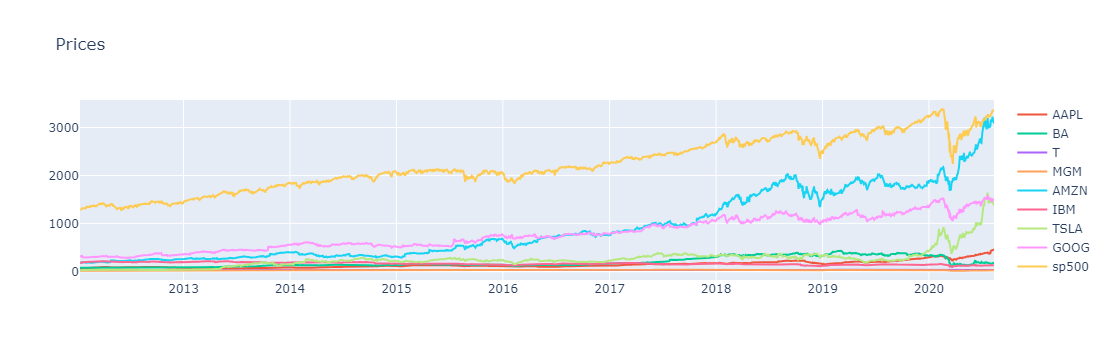

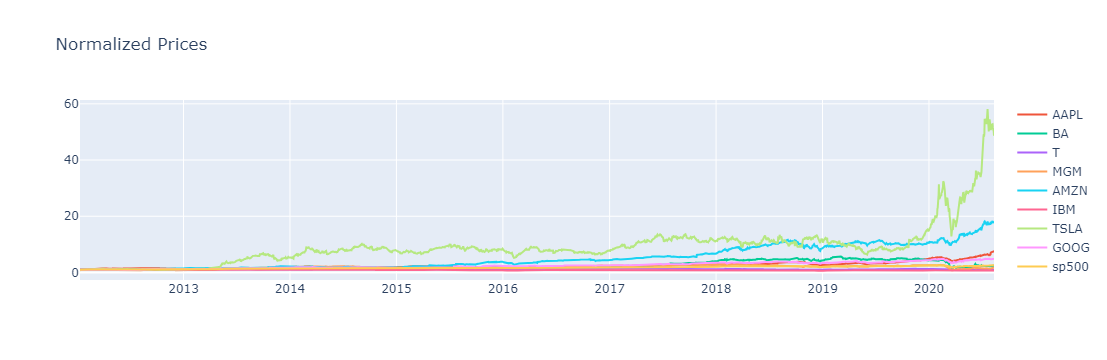

In [8]:
#绘制归一化和非归一化的股票价格图
interactive_plot(stocks_df, 'Prices')
interactive_plot(normalize(stocks_df), 'Normalized Prices')

In [26]:
#  PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN
# Let's create random portfolio weights
# Portfolio weights must sum to 1

# Set random seed
np.random.seed() # 没有提供种子，所以每次运行都会生成不同的随机序列。这使得结果更具随机性，但不可重复。

# Create random weights for the stocks and normalize them
# 生成一个长度为9的随机数数组，其中每个数都在0和1之间。
weights = np.array(np.random.random(9)) # 这里的9表示投资组合中有9只股票。

# Ensure that the sum of all weights are = 1
# 将每个权重除以权重总和，归一化处理以确保所有权重加起来等于1。
weights = weights/np.sum(weights)
print(weights)

[0.13164812 0.15158863 0.12240657 0.18140709 0.05447853 0.04020868
 0.04220242 0.13720056 0.13885939]


In [27]:
# Normalize the stock avalues
df_portfolio = normalize(stocks_df)
df_portfolio

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

In [19]:
df_portfolio.columns[1:]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [28]:
#这段代码主要用于调整一个投资组合的股票持仓，将权重应用于各股票，并将它们转换为货币金额。
#具体来说，这是在处理如何将资金按照给定的权重分配到各个股票上，并计算出每只股票的实际投资额。

# Note that enumerate returns the value and a counter as well
# 这个函数用于遍历 DataFrame 的列名，从第二列开始，并返回每一列的索引（counter）和列名（stock）。
for counter, stock in enumerate(df_portfolio.columns[1:]):
  # counter：这是从0开始的索引，它对应于 weights 数组中的位置，确保每个股票的权重正确应用。
  # stock：这是列名，代表股票或资产的名称。
  df_portfolio[stock] = df_portfolio[stock] * weights[counter] #将每只股票的归一化值乘以其对应的权重。权重决定了每只股票在总投资中所占的比例。
  df_portfolio[stock] = df_portfolio[stock] * 100 # 将上一步的结果（现在代表了投资组合中每只股票的比例份额）转换为实际的货币金额。这里乘以100是基于假设投资组合的总价值为100元

df_portfolio

Date       AAPL         BA          T        MGM       AMZN  \
0     2012-01-12  13.164812  15.158863  12.240657  18.140709   5.447853   
1     2012-01-13  13.115452  14.976177  12.220337  18.469724   5.524959   
2     2012-01-17  13.268222  15.104659  12.293488  18.320172   5.625289   
3     2012-01-18  13.405997  15.068524  12.326000  19.038023   5.866205   
4     2012-01-19  13.363508  15.168900  12.362576  19.142710   6.021344   
...          ...        ...        ...        ...        ...        ...   
2154  2020-08-05  96.278179  34.987242  12.130930  25.005163  99.247051   
2155  2020-08-06  99.637250  34.569675  12.126866  27.607376  99.865442   
2156  2020-08-07  97.196678  34.132035  12.200017  28.459827  98.083656   
2157  2020-08-10  98.609413  36.017106  12.273169  32.378099  97.486010   
2158  2020-08-11  95.676782  36.161648  12.273169  32.153771  95.396113   

           IBM        TSLA       GOOG      sp500  
0     4.020868    4.220242  13.720056  13.885939  
1     3.989913    3.404577  13.618732  13.817232  
2     4.008620    3.973750  13.696959  13.866324  
3     4.032449    4.005121  13.791311  14.020350  
4     4.020200    3.997652  13.936435  14.089592  
...        ...         ...        ...        ...  
2154  2.793785  221.845775  64.461580  35.669016  
2155  2.808706  222.526979  65.620358  35.898286  
2156  2.782873  217.019005  65.374955  35.921011  
2157  2.830754  211.918859  65.445382  36.019514  
2158  2.822736  205.318860  64.755100  35.732470  

[2159 rows x 10 columns]

In [29]:
# 这段代码是用于计算投资组合在每一天的总价值，并将结果存储在一个新的列中。
# drop('Date', axis=1) 方法从 df_portfolio DataFrame 中移除 'Date' 列。axis=1 指定了操作应该沿着列进行（即移除列），而不是沿着行（axis=0）
# .sum(axis=1) 计算 DataFrame 的每一行的总和。因为已经移除了 'Date' 列，剩下的都是数值列，代表每只股票的当日价值。
# 这部分将计算出的每日总价值赋值给 df_portfolio 中新的一列 'portfolio daily worth in $'。如果这一列之前不存在，Pandas 会自动创建这一列。

df_portfolio['portfolio daily worth in $'] = df_portfolio.drop('Date', axis=1).sum(axis = 1)
df_portfolio

Date       AAPL         BA          T        MGM       AMZN  \
0     2012-01-12  13.164812  15.158863  12.240657  18.140709   5.447853   
1     2012-01-13  13.115452  14.976177  12.220337  18.469724   5.524959   
2     2012-01-17  13.268222  15.104659  12.293488  18.320172   5.625289   
3     2012-01-18  13.405997  15.068524  12.326000  19.038023   5.866205   
4     2012-01-19  13.363508  15.168900  12.362576  19.142710   6.021344   
...          ...        ...        ...        ...        ...        ...   
2154  2020-08-05  96.278179  34.987242  12.130930  25.005163  99.247051   
2155  2020-08-06  99.637250  34.569675  12.126866  27.607376  99.865442   
2156  2020-08-07  97.196678  34.132035  12.200017  28.459827  98.083656   
2157  2020-08-10  98.609413  36.017106  12.273169  32.378099  97.486010   
2158  2020-08-11  95.676782  36.161648  12.273169  32.153771  95.396113   

           IBM        TSLA       GOOG      sp500  portfolio daily worth in $  
0     4.020868    4.220242  13.720056  13.885939                  100.000000  
1     3.989913    3.404577  13.618732  13.817232                   99.137103  
2     4.008620    3.973750  13.696959  13.866324                  100.157482  
3     4.032449    4.005121  13.791311  14.020350                  101.553980  
4     4.020200    3.997652  13.936435  14.089592                  102.102917  
...        ...         ...        ...        ...                         ...  
2154  2.793785  221.845775  64.461580  35.669016                  592.418721  
2155  2.808706  222.526979  65.620358  35.898286                  600.660938  
2156  2.782873  217.019005  65.374955  35.921011                  591.170056  
2157  2.830754  211.918859  65.445382  36.019514                  592.978305  
2158  2.822736  205.318860  64.755100  35.732470                  580.290649  

[2159 rows x 11 columns]

In [31]:
# Let's calculate the portfolio daily return
# Define a new column in the dataframe and set it to zeros
df_portfolio['portfolio daily % return'] = 0.000  # 初始化收益率列,整列所有行的初始值设为 0.000

for i in range(1, len(stocks_df)): # 索引从 1 开始是因为计算日收益率需要前一天的数据作为参考
  # Calculate the percentage of change from the previous day - (当天的价值 - 前一天的价值) / 前一天的价值 * 100
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100

df_portfolio

Date       AAPL         BA          T        MGM       AMZN  \
0     2012-01-12  13.164812  15.158863  12.240657  18.140709   5.447853   
1     2012-01-13  13.115452  14.976177  12.220337  18.469724   5.524959   
2     2012-01-17  13.268222  15.104659  12.293488  18.320172   5.625289   
3     2012-01-18  13.405997  15.068524  12.326000  19.038023   5.866205   
4     2012-01-19  13.363508  15.168900  12.362576  19.142710   6.021344   
...          ...        ...        ...        ...        ...        ...   
2154  2020-08-05  96.278179  34.987242  12.130930  25.005163  99.247051   
2155  2020-08-06  99.637250  34.569675  12.126866  27.607376  99.865442   
2156  2020-08-07  97.196678  34.132035  12.200017  28.459827  98.083656   
2157  2020-08-10  98.609413  36.017106  12.273169  32.378099  97.486010   
2158  2020-08-11  95.676782  36.161648  12.273169  32.153771  95.396113   

           IBM        TSLA       GOOG      sp500  portfolio daily worth in $  \
0     4.020868    4.220242  13.720056  13.885939                  100.000000   
1     3.989913    3.404577  13.618732  13.817232                   99.137103   
2     4.008620    3.973750  13.696959  13.866324                  100.157482   
3     4.032449    4.005121  13.791311  14.020350                  101.553980   
4     4.020200    3.997652  13.936435  14.089592                  102.102917   
...        ...         ...        ...        ...                         ...   
2154  2.793785  221.845775  64.461580  35.669016                  592.418721   
2155  2.808706  222.526979  65.620358  35.898286                  600.660938   
2156  2.782873  217.019005  65.374955  35.921011                  591.170056   
2157  2.830754  211.918859  65.445382  36.019514                  592.978305   
2158  2.822736  205.318860  64.755100  35.732470                  580.290649   

      portfolio daily % return  
0                     0.000000  
1                    -0.862897  
2                     1.029261  
3                     1.394302  
4                     0.540537  
...                        ...  
2154                  0.762486  
2155                  1.391282  
2156                 -1.580073  
2157                  0.305876  
2158                 -2.139649  

[2159 rows x 12 columns]

In [34]:
# Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# We will create a function that takes in the stock prices along with the weights and return:
# (1) Daily value of each individual securuty in $ over the specified time period
# (2) Overall daily worth of the entire portfolio
# (3) Daily return
def portfolio_allocation(df, weights):

    df_portfolio = df.copy()

    # Normalize the stock values
    df_portfolio = normalize(df_portfolio)

    for counter, stock in enumerate(df_portfolio.columns[1:]):
        df_portfolio[stock] = df_portfolio[stock] * weights[counter] * 100

    df_portfolio['portfolio daily worth in $'] = df_portfolio.drop('Date', axis = 1).sum(axis = 1)

    df_portfolio['portfolio daily % return'] = 0.0000

    for i in range(1, len(stocks_df)):

        # Calculate the percentage of change from the previous day
        df_portfolio['portfolio daily % return'][i] = ((df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1])/ df_portfolio['portfolio daily worth in $'][i-1]) * 100

    # set the value of first row to zero, as previous value is not available
    df_portfolio['portfolio daily % return'][0] = 0

    return df_portfolio

In [35]:
portfolio_allocation(stocks_df, weights)

Date       AAPL         BA          T        MGM       AMZN  \
0     2012-01-12  13.164812  15.158863  12.240657  18.140709   5.447853   
1     2012-01-13  13.115452  14.976177  12.220337  18.469724   5.524959   
2     2012-01-17  13.268222  15.104659  12.293488  18.320172   5.625289   
3     2012-01-18  13.405997  15.068524  12.326000  19.038023   5.866205   
4     2012-01-19  13.363508  15.168900  12.362576  19.142710   6.021344   
...          ...        ...        ...        ...        ...        ...   
2154  2020-08-05  96.278179  34.987242  12.130930  25.005163  99.247051   
2155  2020-08-06  99.637250  34.569675  12.126866  27.607376  99.865442   
2156  2020-08-07  97.196678  34.132035  12.200017  28.459827  98.083656   
2157  2020-08-10  98.609413  36.017106  12.273169  32.378099  97.486010   
2158  2020-08-11  95.676782  36.161648  12.273169  32.153771  95.396113   

           IBM        TSLA       GOOG      sp500  portfolio daily worth in $  \
0     4.020868    4.220242  13.720056  13.885939                  100.000000   
1     3.989913    3.404577  13.618732  13.817232                   99.137103   
2     4.008620    3.973750  13.696959  13.866324                  100.157482   
3     4.032449    4.005121  13.791311  14.020350                  101.553980   
4     4.020200    3.997652  13.936435  14.089592                  102.102917   
...        ...         ...        ...        ...                         ...   
2154  2.793785  221.845775  64.461580  35.669016                  592.418721   
2155  2.808706  222.526979  65.620358  35.898286                  600.660938   
2156  2.782873  217.019005  65.374955  35.921011                  591.170056   
2157  2.830754  211.918859  65.445382  36.019514                  592.978305   
2158  2.822736  205.318860  64.755100  35.732470                  580.290649   

      portfolio daily % return  
0                     0.000000  
1                    -0.862897  
2                     1.029261  
3                     1.394302  
4                     0.540537  
...                        ...  
2154                  0.762486  
2155                  1.391282  
2156                 -1.580073  
2157                  0.305876  
2158                 -2.139649  

[2159 rows x 12 columns]

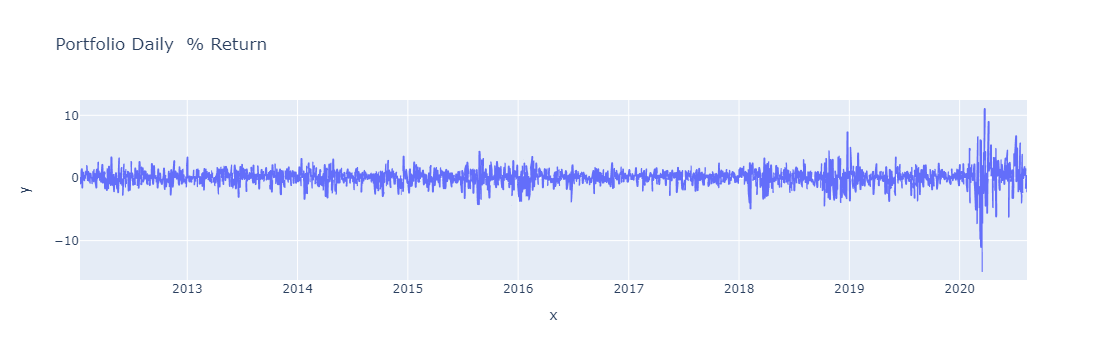

In [36]:
# Plot the portfolio daily return
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = 'Portfolio Daily  % Return')
fig.show()

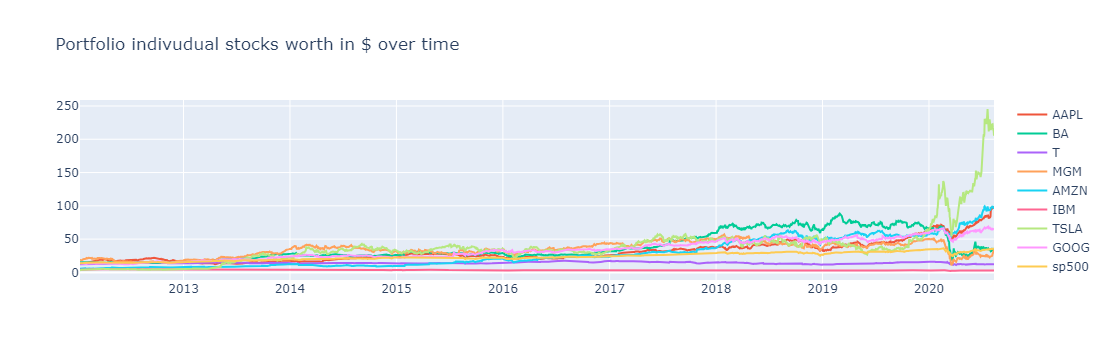

In [37]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop(['portfolio daily worth in $','portfolio daily % return'], axis = 1),'Portfolio indivudual stocks worth in $ over time')

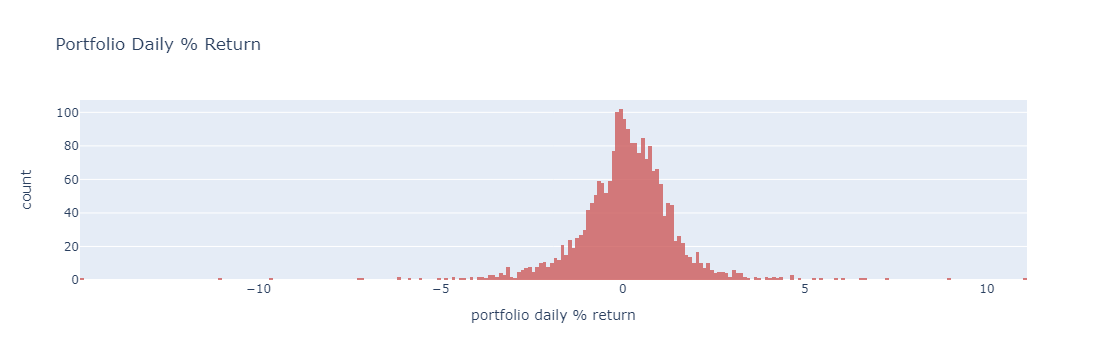

In [47]:
# Print out a histogram of daily returns

fig = px.histogram(df_portfolio, 
                   x = 'portfolio daily % return', 
                   nbins = 500, 
                   opacity = 0.8,
                   title='Portfolio Daily % Return',
                   color_discrete_sequence=['indianred']) # color of histogram bars
fig.show()

In [48]:
df_portfolio

Date       AAPL         BA          T        MGM       AMZN  \
0     2012-01-12  13.164812  15.158863  12.240657  18.140709   5.447853   
1     2012-01-13  13.115452  14.976177  12.220337  18.469724   5.524959   
2     2012-01-17  13.268222  15.104659  12.293488  18.320172   5.625289   
3     2012-01-18  13.405997  15.068524  12.326000  19.038023   5.866205   
4     2012-01-19  13.363508  15.168900  12.362576  19.142710   6.021344   
...          ...        ...        ...        ...        ...        ...   
2154  2020-08-05  96.278179  34.987242  12.130930  25.005163  99.247051   
2155  2020-08-06  99.637250  34.569675  12.126866  27.607376  99.865442   
2156  2020-08-07  97.196678  34.132035  12.200017  28.459827  98.083656   
2157  2020-08-10  98.609413  36.017106  12.273169  32.378099  97.486010   
2158  2020-08-11  95.676782  36.161648  12.273169  32.153771  95.396113   

           IBM        TSLA       GOOG      sp500  portfolio daily worth in $  \
0     4.020868    4.220242  13.720056  13.885939                  100.000000   
1     3.989913    3.404577  13.618732  13.817232                   99.137103   
2     4.008620    3.973750  13.696959  13.866324                  100.157482   
3     4.032449    4.005121  13.791311  14.020350                  101.553980   
4     4.020200    3.997652  13.936435  14.089592                  102.102917   
...        ...         ...        ...        ...                         ...   
2154  2.793785  221.845775  64.461580  35.669016                  592.418721   
2155  2.808706  222.526979  65.620358  35.898286                  600.660938   
2156  2.782873  217.019005  65.374955  35.921011                  591.170056   
2157  2.830754  211.918859  65.445382  36.019514                  592.978305   
2158  2.822736  205.318860  64.755100  35.732470                  580.290649   

      portfolio daily % return  
0                     0.000000  
1                    -0.862897  
2                     1.029261  
3                     1.394302  
4                     0.540537  
...                        ...  
2154                  0.762486  
2155                  1.391282  
2156                 -1.580073  
2157                  0.305876  
2158                 -2.139649  

[2159 rows x 12 columns]

In [51]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)
cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))

Cummulative return of the portfolio is 480.29064882769086 %


In [52]:
# Calculate the portfolio standard deviation
print('Standard deviation of the protfolio is {}'.format(df_portfolio['portfolio daily % return'].std()))

Standard deviation of the protfolio is 1.406788548321301


In [53]:
# Calculate the average daily return 
print('Average daily return of the portfolio is {}'.format(df_portfolio['portfolio daily % return'].mean()))

Average daily return of the portfolio is 0.0914449586818284


If the Sharpe ratio is calculated using returns that are not annual (e.g., monthly, daily), it needs to be annualized to compare across different investments or against benchmarks that report annual figures:

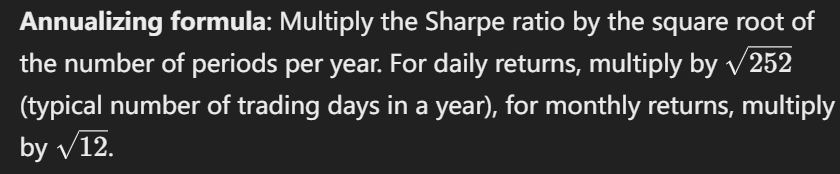

In [60]:
# Portfolio sharpe ratio
# df_portfolio['portfolio daily % return'].mean(): 这部分计算了 df_portfolio 中 portfolio daily % return 列的平均值，也就是投资组合的平均日收益率。
# df_portfolio['portfolio daily % return'].std(): 这部分计算了同一列的标准差，表示投资组合收益的波动性或风险。
# np.sqrt(252): 这是对日数据进行年化处理的一个常用方法。252 是金融市场中常用的每年交易日的天数。开方是因为标准差的年化需要考虑到波动性的平方根规律。
sharp_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Sharp ratio of the portfolio is {}'.format(sharp_ratio))

Sharp ratio of the portfolio is 1.0318847972343768


In [57]:
# Example of calculating an annualized Sharpe ratio using daily returns with a specific risk-free rate

# Example daily returns and risk-free rate
daily_returns = df_portfolio['portfolio daily % return']
risk_free_rate = 0.05 / 252  # Assuming 5% annual risk-free rate, adjusted daily

# Calculate daily excess returns
excess_returns = daily_returns - risk_free_rate

# Calculate Sharpe ratio
sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)
annualized_sharpe_ratio = sharpe_ratio * np.sqrt(252)  # Annualize the Sharpe ratio

print("Annualized Sharpe Ratio:", annualized_sharpe_ratio)


Annualized Sharpe Ratio: 1.029884402416124


15.874507866387544